# Clustering.#
## Describe the spatial distribution in order to classify each format for loss run reports ##

In [2]:
## Load dependecies
import numpy as np 
import matplotlib.pyplot as plt 
import scipy as sp
import cv2 
import lossrun
import pandas as pd

## Define loss runs txt files and read each class ## 

In [3]:
## load report by classe VGM
PATH_a = '/home/zned897/Downloads/Extract2(1)/vgm/'
files_a = os.listdir(PATH_a)

## load report by classe PIONER
PATH_b = '/home/zned897/Downloads/Extract2(1)/pioneer/'
files_b = os.listdir(PATH_b)

## load report by classe 
PATH_c = '/home/zned897/Downloads/Extract2(1)/sedgwick/'
files_c = os.listdir(PATH_c)

# read the data from pdf of interes
_txt_path = './data/txt/'
_image_path = './data/images/'

# class A files
txt_a_files = [j for i in files_a for j in (os.listdir(_txt_path)) if i[:-4] in j]
iamge_a_files = [j for i in files_a for j in (os.listdir(_image_path)) if i[:-4] in j]

# class b files 
txt_b_files = [j for i in files_b for j in (os.listdir(_txt_path)) if i[:-4] in j]
iamge_b_files = [j for i in files_b for j in (os.listdir(_image_path)) if i[:-4] in j]

# class c files
txt_c_files = [j for i in files_c for j in (os.listdir(_txt_path)) if i[:-4] in j]
iamge_c_files = [j for i in files_c for j in (os.listdir(_image_path)) if i[:-4] in j]

## Extract the spatial features from data ## 

In [4]:
# extract features from A, B, and C directories
A_data = lossrun.extract_statistic_featrues([_txt_path + _file for _file in txt_a_files])

B_data = lossrun.extract_statistic_featrues([_txt_path + _file for _file in txt_b_files])

C_data = lossrun.extract_statistic_featrues([_txt_path + _file for _file in txt_c_files])

## Clusterize and reduce the dimentionality by PCA ##

In [5]:

## Pre processing data
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# General data
DATA = lossrun.extract_statistic_featrues([_txt_path + _file for _file in os.listdir(_txt_path)])

# Data dormalization
sc = StandardScaler()
data_norm = sc.fit_transform(DATA.T)

# Principal components decompsition 
pca = PCA(n_components=3)
componets = pca.fit_transform(data_norm)


In [6]:
componets.shape

(213, 3)

## Data visualization ##

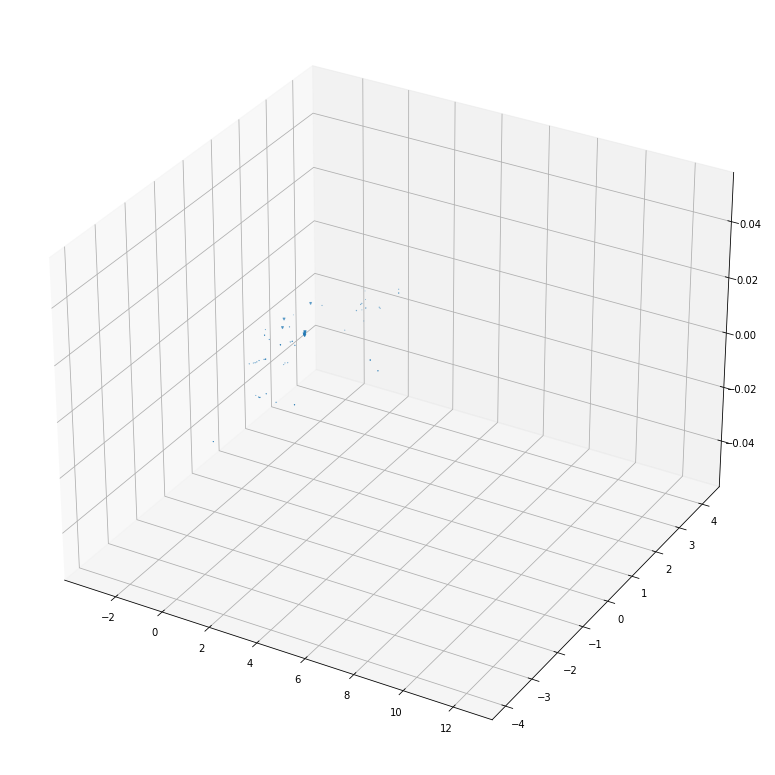

In [27]:
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

# create the canvas
fig = plt.figure(figsize=(17,14))
# define the 3d projection
ax = fig.add_subplot(111, projection='3d')
# plot the data
plt.scatter(componets[:,0],componets[:,1], componets[:,2], marker='v')

## Create the herarical cluster ##

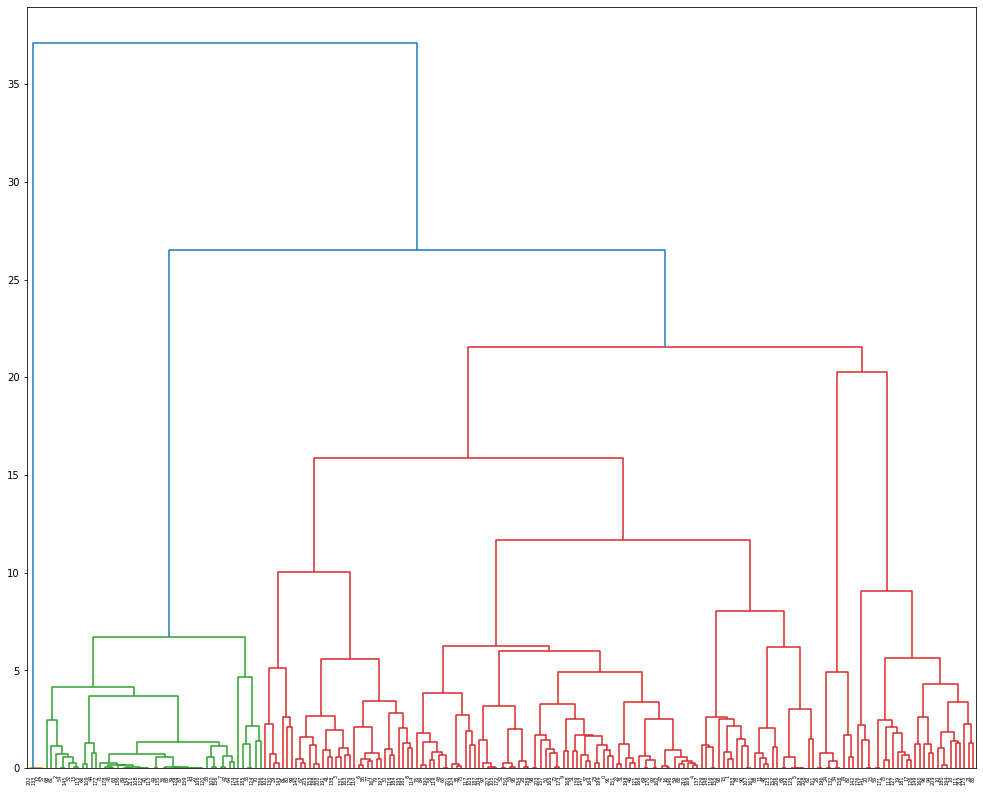

In [8]:
## herarical cluster
import scipy.cluster.hierarchy as shc


# create the dendrogram 
plt.figure(figsize=(17,14))
dend = shc.dendrogram(shc.linkage(data_norm, method='ward'))

In [ ]:
# Grup elements for each cluster 
from sklearn.cluster import AgglomerativeClustering

# define the cluster configuration
cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward') 
# fit the data into 10 clusters
cluster.fit_predict(data_norm)

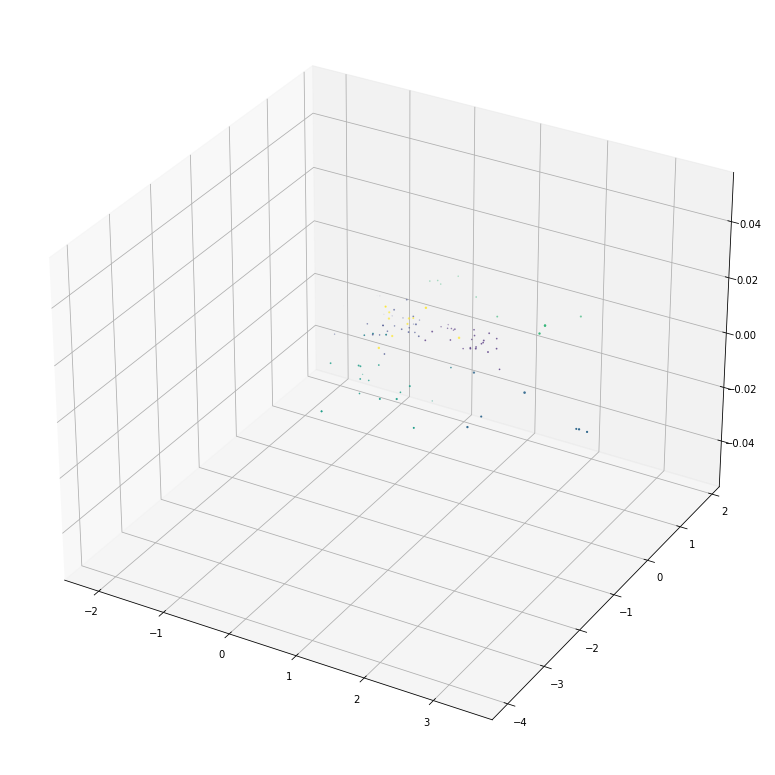

In [11]:

# create the canvas
fig = plt.figure(figsize=(17,14))
# define the 3d projection
ax = fig.add_subplot(111, projection='3d')
# plot the data
plt.scatter(data_norm[:,1], data_norm[:,2],data_norm[:,3], c=cluster.labels_)